In [39]:
import numpy as np
import pandas as pd

import utils.AlphaVantageUtils as av
import utils.PostgresUtils as pg
import utils.ModelUtils as mdl

In [40]:
df_prices = pg.get_prices(av._TIC_MICROSOFT, av._INT_DAILY, None, None, None)

df_prices.index = df_prices[pg._COL_DATETIME]

df_prices.drop(columns=[pg._COL_DATETIME, pg._COL_ID, pg._COL_TICKER, pg._COL_INTERVAL, pg._COL_VOLUME], inplace=True)

df_prices.sort_values(by=pg._COL_DATETIME, inplace=True)

df_prices.head()

,open,high,low,close
datetime,,,,
2000-01-20,107.06,109.69,105.87,106.00
2000-01-21,107.00,107.25,103.25,103.75
2000-01-24,103.80,105.69,100.81,101.25
2000-01-25,101.00,103.87,99.56,102.81
2000-01-26,102.44,103.50,99.12,99.37


In [41]:
df_train, df_test = mdl.train_test_split(df_prices, 0.1)

train = df_train[pg._COL_CLOSE]
test = df_test[pg._COL_CLOSE]

In [42]:
df_prices.shape, df_train.shape, df_test.shape

((5033, 4), (4530, 4), (503, 4))

In [43]:
min(train.index), max(train.index), min(test.index), max(test.index)

(Timestamp('2000-01-20 00:00:00'),
 Timestamp('2018-01-22 00:00:00'),
 Timestamp('2018-01-23 00:00:00'),
 Timestamp('2020-01-22 00:00:00'))

In [47]:
from pyramid.arima import auto_arima

model = auto_arima(train, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, 
                   trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(test))

forecast = pd.DataFrame(forecast, index=test.index, columns=['prediction'])

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=12901.292, BIC=12933.370, Fit time=23.752 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=15790.643, BIC=15803.474, Fit time=0.400 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=14565.318, BIC=14590.981, Fit time=4.688 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=12895.698, BIC=12921.360, Fit time=24.172 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=12893.721, BIC=12925.799, Fit time=26.407 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=14565.337, BIC=14590.999, Fit time=4.288 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=12892.600, BIC=12931.094, Fit time=102.415 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=12900.356, BIC=12945.265, Fit time=105.133 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 2, 12); AIC=12901.631, BIC=12933.709, Fit time=90.146 seconds
Fi

In [51]:
rms = np.sqrt(np.mean(np.power((np.array(test)-np.array(forecast['prediction'])),2)))
rms

10.587491291939655

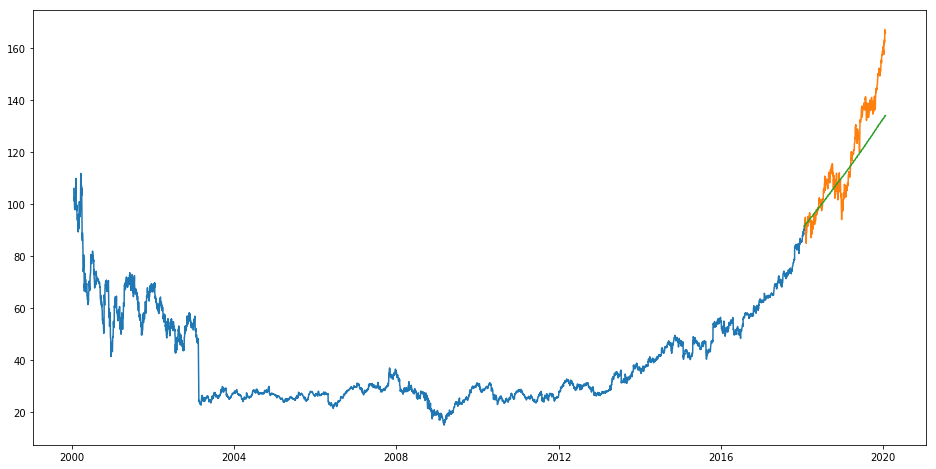

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

# Plot
plt.plot(train)
plt.plot(test)
plt.plot(forecast['prediction'])

In [ ]:
!pip install pmdarima

In [ ]:
!pip install pyramid-arima